## Confusion Matrix


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---


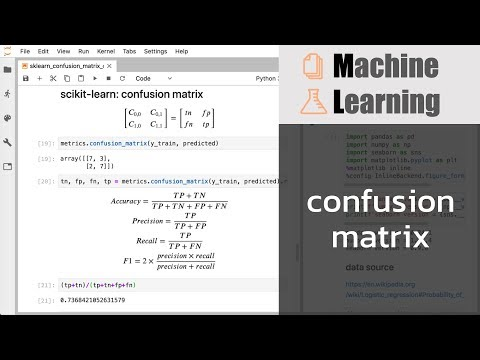

In [137]:
from IPython.display import YouTubeVideo

YouTubeVideo("-ghTyCXxPm4", width=720, height=405)

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format='svg'

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('error', category=DeprecationWarning)


In [139]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")
pd.Timestamp.now()


pandas  version = 2.1.4
numpy   version = 1.26.3
seaborn version = 0.12.2


Timestamp('2024-03-27 06:32:59.004963')

### data source

https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study


In [140]:
df = pd.read_csv(
    "https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv"
)
df.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


In [141]:
# df.loc[14, 'Pass']=0
# df.T

In [142]:
df

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


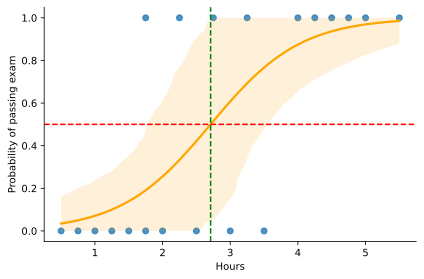

In [143]:
sns.lmplot(
    x="Hours",
    y="Pass",
    data=df,
    logistic=True,
    height=4,
    aspect=1.5,
    line_kws={"color": "orange"},
)
plt.ylabel("Probability of passing exam")
plt.axvline(2.71, color="green", linestyle="--")
plt.axhline(0.5, color="red", linestyle="--");

# Scikit-learn: LogisticRegression

doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [144]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [145]:
print(f"sklearn version = {sklearn.__version__}")


sklearn version = 1.2.2


In [146]:
X = df[["Hours"]]
y = df.Pass
test_size = 0.3
# test_size=0
X_train, X_test, y_train, y_test = train_test_split(
    df[["Hours"]], df.Pass, test_size=test_size, random_state=4
)

X_train = X
y_train = y

In [147]:
X_train  # pandas DataFrame



,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50
5,1.75
6,1.75
7,2.00
8,2.25
9,2.50


In [148]:
y_train  # pandas Series



0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    1
17    1
18    1
19    1
Name: Pass, dtype: int64

In [149]:
model = LogisticRegression(solver="lbfgs")
# model = LogisticRegression(C = 1e10, solver='lbfgs') # disable regularization
model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [150]:
model.fit(X_train, y_train) # train model


LogisticRegression()

In [151]:
model.score(X_train, y_train)  # accuracy of train model

0.8

In [152]:
model.score(X_test, y_test)  # accuracy when using test dataset

0.6666666666666666

In [153]:
predicted = model.predict(X_train)
predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [154]:
y_train.values


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## Confusion matrix


In [155]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score


### further reading:

-   https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
-   https://en.wikipedia.org/wiki/Confusion_matrix


In [156]:
X_train["Hours"].values



array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ])

In [157]:
y_train.values


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [158]:
predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## scikit-learn: confusion matrix

$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>


In [159]:
y_train

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    1
17    1
18    1
19    1
Name: Pass, dtype: int64

In [160]:
predicted_train = model.predict(X_train)
predicted_train


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [161]:
cm=confusion_matrix(y_train, predicted_train)
cm

array([[8, 2],
       [2, 8]], dtype=int64)

In [162]:
predicted_test = model.predict(X_test)
predicted_test


array([1, 0, 1, 0, 1, 0], dtype=int64)

In [163]:
cm=confusion_matrix(y_test, predicted_test)
cm

array([[2, 1],
       [1, 2]], dtype=int64)

In [164]:
df_cf = pd.DataFrame(
    metrics.confusion_matrix(y_test, predicted_test),
    columns=["pred_fail", "pred_pass"],
    index=["actual_fail", "actual_pass"],
)
df_cf


,pred_fail,pred_pass
actual_fail,2,1
actual_pass,1,2


In [165]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted).ravel()


In [166]:
print(f"tn = {tn}")
print(f"fp = {fp}")
print(f"fn = {fn}")
print(f"tp = {tp}")



tn = 8
fp = 2
fn = 2
tp = 8


$$
Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$


In [167]:
print(metrics.classification_report(y_train, predicted_train))


In [168]:
metrics.accuracy_score(y_train, predicted_train)


tn = 8
fp = 2
fn = 2
tp = 8


In [169]:
metrics.precision_score(y_train, predicted_train)


SyntaxError: invalid syntax (1353118788.py, line 1)

In [ ]:
metrics.recall_score(y_train, predicted_train)


In [ ]:
metrics.f1_score(y_train, predicted_train)


In [ ]:
metrics.precision_recall_fscore_support(y_train, predicted_train)


In [ ]:
tp / (tp + fp)  # precision (class = 1)



In [ ]:
tp / (tp + fn)  # recall (class = 1)



In [ ]:
tn / (tn + fn)  # precision (class = 0)



In [ ]:
tn / (tn + fp)  # recall (class = 0)

